In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# 0. Together

Principle component analysis (PCA) is a method of *dimensionality reduction* that takes the information in multiple variables/predictors, and presents that information (or at least MOST of it) in a smaller number of features. This smaller number of features--called components--are all linear combinations of the original variables, and the features are created in a way (eigendecomposition, if you're interested!) that makes the 1st component contain the MOST variability in the data, the 2nd component contain the second most variability...and so on.

This allows us to choose only a handful of features (usually the first N features) that contain *most* of the information from the original data. This is helpful becuase few features often means faster models.

We discussed 2 ways to choose the number of components that you retain:


* a) **The Elbow Method**: create a scree plot, and find the "elbow" of the graph. Retain all the components at and before the elbow.
* b) **The Percentage Method**: specify a specific % of variance that's acceptable to retain (e.g. 95%), and retain enough components to achieve that %.
    
    
    
<img src="https://drive.google.com/uc?export=view&id=1crCW8BAFVEu50th9VhdJMYakZho03kp0" width = 500px />


In [2]:
#If they were not correlated this would be a diagonal straight diagonal 
#If highly correlated this would be a right angle 

# 1. Using PCs as predictors

Using `data`, build a logistic regression model using *all* the variables (V1-V11; make sure you z score) that predicts the variable `Outcome`. Then run PCA on the predictors (V1-V11). Now build a model that uses the first 1,3,5, and 10 components.

* How much variance do the 1,3,5, and 10 components cover?
* How does each model do on train/test accuracy? How do they do compared to the full model?
* What patterns do you observe, and why do you think those patterns exist?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pcaLogit.csv")

data.head()
### YOUR CODE HERE ###

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Outcome
0,-0.149337,0.442119,0.576677,1.153935,2.200429,-3.263321,-1.168562,-0.061753,-1.826888,0.152121,-0.780083,1
1,0.814597,-0.071904,2.436344,1.441524,-0.262304,1.088893,0.839062,0.783944,0.398013,-0.243652,2.141202,0
2,0.367023,0.655140,-0.431427,-1.283513,-1.331135,-0.422708,0.399706,-0.376874,0.751164,1.427323,-1.289143,1
3,0.032182,-1.268488,-0.327227,1.398891,-0.871737,0.211705,0.239753,3.127677,-1.364123,-2.663003,0.437166,0
4,-1.092720,-0.093706,-0.744864,0.891042,-0.212384,0.086259,0.382121,1.322998,-0.629167,-1.198671,0.699633,0


In [4]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'Outcome'],
      dtype='object')

In [5]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
X = data[features]

In [6]:
z = StandardScaler()
X[features] = z.fit_transform(X[features])

C:\Users\nickc\anaconda3\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
logr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X[features], data["Outcome"], test_size = 0.2)
logr.fit(X_train, y_train)
accuracy_score(y_test, logr.predict(X_test))

0.95

In [8]:
pca = PCA()
pca.fit(X[features])

PCA()

In [9]:
pcaDF = pd.DataFrame({ "explained_variance": pca.explained_variance_ratio_,
                      "PC": range(0, 11),
                      "Cumulative Variance": pca.explained_variance_ratio_.cumsum()
    
})
pcaDF

,explained_variance,PC,Cumulative Variance
0,0.250140,0,0.250140
1,0.192895,1,0.443035
2,0.171182,2,0.614217
3,0.134030,3,0.748247
4,0.099045,4,0.847292
5,0.063562,5,0.910855
6,0.044675,6,0.955530
7,0.026872,7,0.982401
8,0.012519,8,0.994920
9,0.004283,9,0.999204


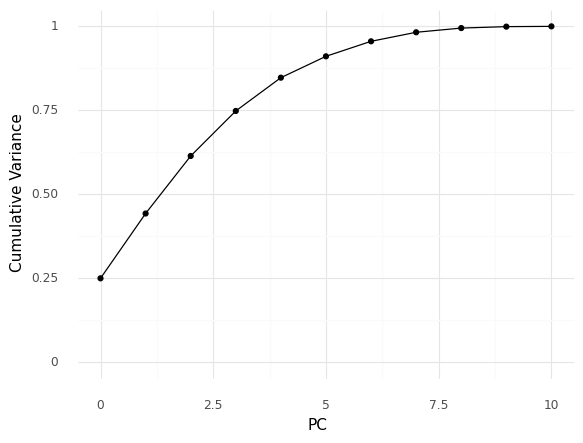

<ggplot: (146081183693)>

In [10]:
(ggplot(pcaDF, aes(x = "PC", y = "Cumulative Variance")) + geom_line() + geom_point() + theme_minimal()
 + ylim(0,1)
)

In [11]:
pcoms1 = pca.transform(X[features])
pcoms1DF = pd.DataFrame(pcoms1[:, 0:1])
pcoms1DF

,0
0,0.779528
1,1.681216
2,-1.813720
3,1.452251
4,1.222047
...,...
95,0.178983
96,1.044076
97,-1.666724
98,-1.573117


In [12]:
logr1 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pcoms1DF, data["Outcome"], test_size = 0.2)
logr1.fit(X_train, y_train)
accuracy_score(y_test, logr1.predict(X_test))

0.8

In [13]:
pcoms3 = pca.transform(X[features])
pcoms3DF = pd.DataFrame(pcoms3[:, 0:3])
pcoms3DF

,0,1,2
0,0.779528,4.131417,0.545636
1,1.681216,-1.410827,-1.833597
2,-1.813720,-1.123759,1.513315
3,1.452251,0.307655,-2.758188
4,1.222047,0.227881,-0.563745
...,...,...,...
95,0.178983,2.014536,0.086639
96,1.044076,-0.722390,-0.323306
97,-1.666724,-0.661607,-0.197585
98,-1.573117,3.328579,-1.144524


In [14]:
logr3 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pcoms3DF, data["Outcome"], test_size = 0.2)
logr3.fit(X_train, y_train)
accuracy_score(y_test, logr3.predict(X_test))

0.75

In [15]:
pcoms5 = pca.transform(X[features])
pcoms5DF = pd.DataFrame(pcoms1[:, 0:5])
pcoms5DF

,0,1,2,3,4
0,0.779528,4.131417,0.545636,-1.648199,0.464700
1,1.681216,-1.410827,-1.833597,-0.647097,1.450900
2,-1.813720,-1.123759,1.513315,-0.689607,0.496328
3,1.452251,0.307655,-2.758188,2.354609,1.439516
4,1.222047,0.227881,-0.563745,1.782153,0.143743
...,...,...,...,...,...
95,0.178983,2.014536,0.086639,0.212220,-0.258343
96,1.044076,-0.722390,-0.323306,0.900364,1.002775
97,-1.666724,-0.661607,-0.197585,-0.030643,0.436361
98,-1.573117,3.328579,-1.144524,0.094275,0.695032


In [16]:
logr5 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pcoms5DF, data["Outcome"], test_size = 0.2)
logr5.fit(X_train, y_train)
accuracy_score(y_test, logr5.predict(X_test))

0.95

In [17]:
pcoms10 = pca.transform(X[features])
pcoms10DF = pd.DataFrame(pcoms1[:, 0:10])
pcoms10DF

,0,1,2,3,4,5,6,7,8,9
0,0.779528,4.131417,0.545636,-1.648199,0.464700,-0.472294,-0.552548,0.044719,0.204878,0.332557
1,1.681216,-1.410827,-1.833597,-0.647097,1.450900,1.606588,0.690006,0.878003,-0.061038,-0.092019
2,-1.813720,-1.123759,1.513315,-0.689607,0.496328,-0.154059,-1.050514,-0.456645,-0.518437,0.155044
3,1.452251,0.307655,-2.758188,2.354609,1.439516,-1.486676,-0.616533,-0.500450,0.283187,-0.212009
4,1.222047,0.227881,-0.563745,1.782153,0.143743,-0.270884,-0.481014,-0.084824,0.379333,0.251922
...,...,...,...,...,...,...,...,...,...,...
95,0.178983,2.014536,0.086639,0.212220,-0.258343,-0.010579,0.050351,-1.155668,0.107480,0.027356
96,1.044076,-0.722390,-0.323306,0.900364,1.002775,-0.535736,-1.174302,-0.044984,-0.179133,0.531612
97,-1.666724,-0.661607,-0.197585,-0.030643,0.436361,-0.370868,-0.769701,-0.409751,0.516381,0.397344
98,-1.573117,3.328579,-1.144524,0.094275,0.695032,0.088647,-0.204857,0.278736,0.021291,-0.352974


In [18]:
logr10 = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(pcoms10DF, data["Outcome"], test_size = 0.2)
logr10.fit(X_train, y_train)
accuracy_score(y_test, logr10.predict(X_test))

0.9

# 2. PCA with different variable correlations

You can grab all pairwise correlations between variables/features in your model by using the command [`df.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) where `df` is your dataframe.

For the following datasets:

1. Z score the data.
2. Look at the correlations between all the variables in the dataframe. Are they high? low?
3. Perform PCA
4. Make a Scree plot (be sure to add `+ ylim(0,1)`. What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


TIP: to make the scree plot more clear, it can help to add the row [0,0,0] to your dataframe of the explained/cumulative variance. You can do this with:

In [19]:
# THIS CODE WON'T RUN, it's just an example of how to do this
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,12), "cum_var": pca.explained_variance_ratio_.cumsum()})

# add zeros
pcaDF = pcaDF.append(pd.DataFrame({"expl_var" : [0], "pc": [0], "cum_var": [0]}))

In [20]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca0.csv")
d1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.589325,-0.962855,-0.409353,-0.481657,0.391220,-0.261497,0.845311,-0.630942,0.105109,-1.114231,0.819604
1,-0.585161,0.303280,-0.754514,1.478001,-0.230236,-1.620006,2.303447,-2.430098,-0.908377,0.547499,0.352563
2,-0.040111,0.726222,-0.927827,-0.988774,-1.140503,-0.636830,1.886706,-1.167584,0.298881,1.509339,0.769915
3,-1.552609,-0.006793,0.680347,-0.758141,-1.189817,-0.409761,-1.161692,-1.803187,-0.201474,-0.239718,-1.857610
4,-0.238883,0.161020,0.452826,-1.205539,-0.264308,0.587101,-0.335472,-2.392979,-0.826877,1.148070,-0.900304


In [21]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

In [22]:
z = StandardScaler()
d1[features] = z.fit_transform(d1[features])

In [23]:
d1.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
V1,1.000000,0.131204,-0.162995,-0.101962,0.221238,0.177864,-0.042569,0.030860,0.143860,0.062273,-0.121077
V2,0.131204,1.000000,0.061563,-0.049425,-0.118849,-0.110935,-0.123864,0.044916,0.120821,0.172771,0.072274
V3,-0.162995,0.061563,1.000000,-0.051963,-0.112169,-0.018646,-0.167179,-0.031984,-0.116204,-0.014107,0.049088
V4,-0.101962,-0.049425,-0.051963,1.000000,-0.035843,-0.057420,0.011592,-0.090927,-0.059989,0.007824,0.023070
V5,0.221238,-0.118849,-0.112169,-0.035843,1.000000,0.137059,-0.006916,0.106724,0.058668,0.133641,0.018002
V6,0.177864,-0.110935,-0.018646,-0.057420,0.137059,1.000000,-0.037158,0.085828,0.161972,0.038948,-0.023144
V7,-0.042569,-0.123864,-0.167179,0.011592,-0.006916,-0.037158,1.000000,0.013803,-0.013511,0.101780,0.151505
V8,0.030860,0.044916,-0.031984,-0.090927,0.106724,0.085828,0.013803,1.000000,-0.051388,0.016574,0.062824
V9,0.143860,0.120821,-0.116204,-0.059989,0.058668,0.161972,-0.013511,-0.051388,1.000000,0.038946,0.051570
V10,0.062273,0.172771,-0.014107,0.007824,0.133641,0.038948,0.101780,0.016574,0.038946,1.000000,0.184975


In [24]:
pcad1 = PCA()
pcad1.fit(d1[features])
pcad1DF =  pd.DataFrame({ "explained_variance": pcad1.explained_variance_ratio_,
                      "PC": range(0, 11),
                      "Cumulative Variance": pcad1.explained_variance_ratio_.cumsum()})

C:\Users\nickc\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
C:\Users\nickc\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


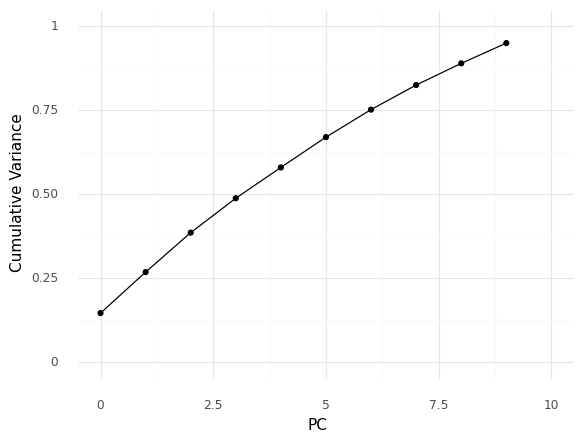

<ggplot: (146081698765)>

In [25]:
(ggplot(pcad1DF, aes(x = "PC", y = "Cumulative Variance")) + geom_line() + geom_point() + theme_minimal()
 + ylim(0,1)
)

In [26]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca5.csv")
d2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.039554,0.566799,1.460380,0.551369,1.353559,1.030651,0.140741,0.810873,1.343591,2.268320,-0.887089
1,-1.209627,0.350666,-0.340243,-0.390595,-2.466304,-1.346314,-0.926472,-0.280642,-0.640843,0.055363,-1.034537
2,-0.129360,-0.157916,-0.729890,-0.681124,0.528222,0.643489,1.002502,0.505844,-0.286316,-0.342354,0.815404
3,0.832150,-0.276044,-1.001197,-0.831879,0.625231,0.364713,0.444775,-0.151327,0.841734,0.311781,-0.129617
4,-0.773324,0.423212,0.262140,2.088551,0.291388,0.590524,-0.120924,1.045262,0.812294,-0.706862,0.419602


In [27]:
features2 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

In [28]:
z = StandardScaler()
d2[features2] = z.fit_transform(d2[features2])

In [29]:
d2.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
V1,1.000000,0.474408,0.421725,0.381632,0.524129,0.471247,0.558116,0.487423,0.483380,0.411385,0.525211
V2,0.474408,1.000000,0.581261,0.372063,0.438902,0.392317,0.403915,0.468488,0.522676,0.371503,0.525335
V3,0.421725,0.581261,1.000000,0.469505,0.393156,0.484173,0.480946,0.399047,0.470532,0.476610,0.422341
V4,0.381632,0.372063,0.469505,1.000000,0.465830,0.496240,0.390160,0.416657,0.485544,0.496946,0.369451
V5,0.524129,0.438902,0.393156,0.465830,1.000000,0.498267,0.465729,0.478396,0.442830,0.404118,0.479939
V6,0.471247,0.392317,0.484173,0.496240,0.498267,1.000000,0.516363,0.469789,0.420690,0.445281,0.600537
V7,0.558116,0.403915,0.480946,0.390160,0.465729,0.516363,1.000000,0.555508,0.421610,0.363722,0.505432
V8,0.487423,0.468488,0.399047,0.416657,0.478396,0.469789,0.555508,1.000000,0.419038,0.447994,0.555108
V9,0.483380,0.522676,0.470532,0.485544,0.442830,0.420690,0.421610,0.419038,1.000000,0.493445,0.445367
V10,0.411385,0.371503,0.476610,0.496946,0.404118,0.445281,0.363722,0.447994,0.493445,1.000000,0.437340


In [30]:
pcad2 = PCA()
pcad2.fit(d2[features2])
pcad2DF =  pd.DataFrame({ "explained_variance": pcad2.explained_variance_ratio_,
                      "PC": range(0, 11),
                      "Cumulative Variance": pcad2.explained_variance_ratio_.cumsum()})

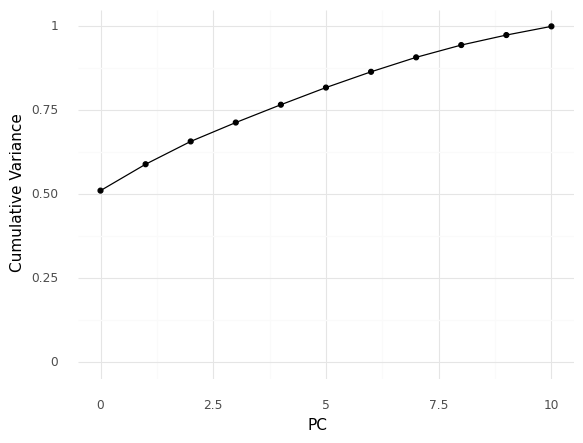

<ggplot: (146081735111)>

In [31]:
(ggplot(pcad2DF, aes(x = "PC", y = "Cumulative Variance")) + geom_line() + geom_point() + theme_minimal()
 + ylim(0,1)
)

In [32]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca9.csv")
d3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.243909,1.182441,1.245221,1.283435,1.379725,1.231338,1.230737,1.102804,1.146487,1.176800,1.208353
1,-0.150383,-0.337870,-0.380147,-0.245898,-0.323991,-0.337898,-0.457001,-0.362397,-0.330366,-0.460161,-0.288632
2,-0.384532,-0.173443,-0.251870,-0.373778,-0.232588,-0.341743,-0.252138,-0.069091,-0.216869,-0.356769,-0.379533
3,1.956517,1.799477,1.918521,1.741209,1.873199,1.929961,2.025591,1.901917,1.861950,1.689937,1.870567
4,-0.391128,-0.239054,-0.341740,-0.204021,-0.196644,-0.244263,-0.062199,-0.247130,-0.303675,-0.200597,-0.239926


In [33]:
features3 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

In [34]:
z = StandardScaler()
d3[features3] = z.fit_transform(d3[features3])

In [35]:
d3.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
V1,1.000000,0.991522,0.991659,0.991809,0.990374,0.989667,0.989765,0.990493,0.991539,0.988013,0.990850
V2,0.991522,1.000000,0.993376,0.993684,0.992664,0.992538,0.993557,0.993372,0.994144,0.990386,0.991736
V3,0.991659,0.993376,1.000000,0.992937,0.991442,0.991224,0.990410,0.991694,0.992464,0.990128,0.992240
V4,0.991809,0.993684,0.992937,1.000000,0.990817,0.991625,0.992648,0.990458,0.993201,0.991621,0.991020
V5,0.990374,0.992664,0.991442,0.990817,1.000000,0.990698,0.991828,0.989431,0.992083,0.989173,0.992630
V6,0.989667,0.992538,0.991224,0.991625,0.990698,1.000000,0.991730,0.990751,0.993000,0.988069,0.991392
V7,0.989765,0.993557,0.990410,0.992648,0.991828,0.991730,1.000000,0.991283,0.991068,0.990973,0.991616
V8,0.990493,0.993372,0.991694,0.990458,0.989431,0.990751,0.991283,1.000000,0.990359,0.990743,0.990352
V9,0.991539,0.994144,0.992464,0.993201,0.992083,0.993000,0.991068,0.990359,1.000000,0.990659,0.992252
V10,0.988013,0.990386,0.990128,0.991621,0.989173,0.988069,0.990973,0.990743,0.990659,1.000000,0.988205


In [36]:
pcad3 = PCA()
pcad3.fit(d2[features2])
pcad3DF =  pd.DataFrame({ "explained_variance": pcad3.explained_variance_ratio_,
                      "PC": range(0, 11),
                      "Cumulative Variance": pcad3.explained_variance_ratio_.cumsum()})

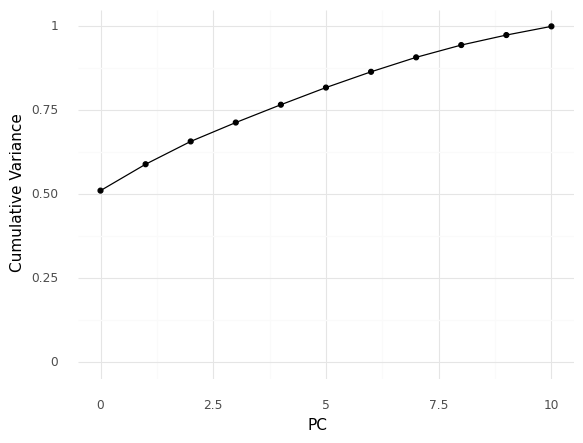

<ggplot: (146081697681)>

In [37]:
(ggplot(pcad3DF, aes(x = "PC", y = "Cumulative Variance")) + geom_line() + geom_point() + theme_minimal()
 + ylim(0,1)
)

In [38]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca10.csv")
d4.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-1.247081,-1.349485,-0.971545,-0.209888,-1.744218,-1.143955,-0.122581,-0.557669,-0.076955,-2.072527,-0.246774
1,0.837563,1.292048,-0.900321,0.313482,0.076978,0.071709,-1.077348,-1.180627,-0.079229,0.594995,0.437940
2,-0.593868,-2.244652,-0.672393,-0.906710,1.015610,0.713235,1.135665,0.926989,-0.801986,-0.512415,-1.586492
3,0.764070,1.935970,-1.345882,-0.154152,-0.329562,-0.077087,0.462192,1.834738,-1.613590,2.502433,-1.652905
4,0.008114,-1.599102,-1.025038,1.723897,0.884198,-0.065314,-2.177886,-0.102330,0.497632,-1.015951,1.868559


In [39]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca11.csv")
d5.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.469553,-1.492115,-0.667141,-0.348074,1.875072,-0.273789,-0.249197,-1.510814,0.646058,1.182230,0.879918
1,-0.330360,-1.395627,1.051138,1.013503,-0.325805,1.598626,-0.210261,-0.988165,1.070902,1.040934,0.821657
2,0.997758,0.825768,-1.033690,-0.228550,0.120673,-1.724621,1.288422,-0.489717,1.856780,-1.413949,0.240121
3,0.239127,1.292628,-0.388788,1.509390,-1.637108,-0.969115,1.698370,1.869058,0.305677,-2.424403,-2.378896
4,-0.984851,-1.142951,-0.221873,-0.282117,1.247947,-1.381092,-0.398786,-0.408970,1.157696,-1.154791,-0.257376


In [40]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca12.csv")
d6.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.023678,-0.980639,-1.681769,1.172364,1.120986,-1.378685,0.599172,1.048552,0.711933,-1.119410,-0.586058
1,-1.231930,2.042191,1.403974,-0.693252,0.979377,-1.155978,0.357632,1.772012,1.079867,-2.845140,0.779203
2,0.161663,1.398153,1.477854,0.703826,0.181505,-1.110450,1.543047,-0.208376,-0.056180,-0.677545,0.214643
3,-2.128514,0.299589,0.552977,-0.345668,1.272981,-0.259482,-0.357618,1.645129,-1.365196,-1.610174,0.377229
4,-0.440999,0.235204,-1.027554,1.380019,0.698138,-1.208494,0.295360,0.484403,0.625122,-0.444403,0.133265
